In [1]:
#TASK : Predict the percentage of marks of an student based on the number of study hours
#NAME : Ishita Joshi

In [2]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
#Import the data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [4]:
#Inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Inspect the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Seperate dependent and independent variables from the dataset
X = data.iloc[:,0].values
y = data.iloc[:,-1].values

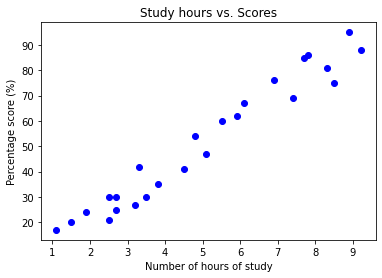

In [7]:
#Visualize the data

plt.scatter(X, y, color = 'blue')
plt.title('Study hours vs. Scores')
plt.xlabel('Number of hours of study')
plt.ylabel('Percentage score (%)')
plt.show()

In [8]:
#Split the data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [10]:
#Training the model on training data

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

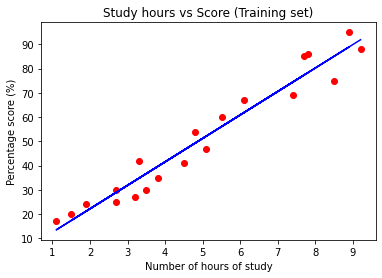

In [11]:
#Visualizing training set results

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Study hours vs Score (Training set)')
plt.xlabel('Number of hours of study')
plt.ylabel('Percentage score (%)')
plt.show()

In [12]:
y_pred = regressor.predict(X_test)

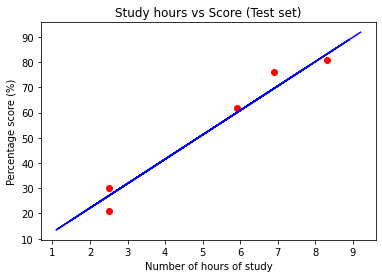

In [13]:
#Visualizing test set results

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Study hours vs Score (Test set)')
plt.xlabel('Number of hours of study')
plt.ylabel('Percentage score (%)')
plt.show()

In [14]:
#Compare actual vs predicted
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[83.18814104 81.        ]
 [27.03208774 30.        ]
 [27.03208774 21.        ]
 [69.63323162 76.        ]
 [59.95115347 62.        ]]


In [15]:
#Check the accuracy of the model
from sklearn import metrics  
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error:{mae}')

Mean Absolute Error:3.9207511902099244


In [16]:
#Predict a new result
hours = 9.25
new_result = regressor.predict([[hours]])
print(f"Number of hours of study : {hours} \nPredicted score: {new_result}")

Number of hours of study : 9.25 
Predicted score: [92.38611528]
